In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import joblib

In [2]:
# Load dataset
df = pd.read_csv('Final Transactions.csv')

In [3]:
# Display first few rows
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [4]:
# Display All Columns
pd.options.display.max_columns = None
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [5]:
# Display dataset shape
df.shape

(1754155, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [7]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 10
Number of rows: 1754155


In [8]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'], errors='coerce')

In [9]:
df['TX_DATE'] = df['TX_DATETIME'].dt.strftime('%Y%m%d').astype(int)  # Converting date to 'YYYYMMDD' format and then to int
df['TX_TIME'] = df['TX_DATETIME'].dt.strftime('%H%M%S').astype(int)  # Converting time to 'HHMMSS' format and then to int

In [10]:
df = df.drop(columns=['TX_DATETIME'])

In [11]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
 9   TX_DATE            int64  
 10  TX_TIME            int64  
dtypes: float64(1), int64(10)
memory usage: 147.2 MB


In [12]:
df.head()

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DATE,TX_TIME
0,0,0,596,3156,533.07,31,0,0,0,20230101,31
1,1,1,4961,3412,808.56,130,0,0,0,20230101,210
2,2,2,2,1365,1442.94,476,0,1,1,20230101,756
3,3,3,4128,8737,620.65,569,0,0,0,20230101,929
4,4,4,927,9906,490.66,634,0,0,0,20230101,1034


In [13]:
# Summary statistics
df.describe()

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DATE,TX_TIME
count,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06,1.754155e+06
mean,8.770770e+05,8.770770e+05,2.504011e+03,4.996733e+03,5.396820e+02,7.903234e+06,9.097260e+01,1.345200e-01,1.449746e-01,2.023037e+07,1.179836e+05
std,5.063811e+05,5.063811e+05,1.445987e+03,2.886101e+03,1.179711e+03,4.565172e+06,5.283709e+01,3.412103e-01,3.874872e-01,1.739174e+02,5.052363e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.023010e+07,1.000000e+00
25%,4.385385e+05,4.385385e+05,1.252000e+03,2.502000e+03,1.799500e+02,3.940846e+06,4.500000e+01,0.000000e+00,0.000000e+00,2.023022e+07,8.230000e+04
50%,8.770770e+05,8.770770e+05,2.506000e+03,4.994000e+03,4.217500e+02,7.902670e+06,9.100000e+01,0.000000e+00,0.000000e+00,2.023040e+07,1.159560e+05
75%,1.315616e+06,1.315616e+06,3.765000e+03,7.495000e+03,7.505950e+02,1.186566e+07,1.370000e+02,0.000000e+00,0.000000e+00,2.023052e+07,1.536460e+05
max,1.754154e+06,1.754154e+06,4.999000e+03,9.999000e+03,6.478375e+05,1.581120e+07,1.820000e+02,1.000000e+00,3.000000e+00,2.023070e+07,2.359590e+05


Visualize Class Imbalance
Use seaborn to visualize the distribution of the target variable to understand class imbalance.

In [14]:
df['TX_FRAUD'].value_counts()

TX_FRAUD
0    1518186
1     235969
Name: count, dtype: int64

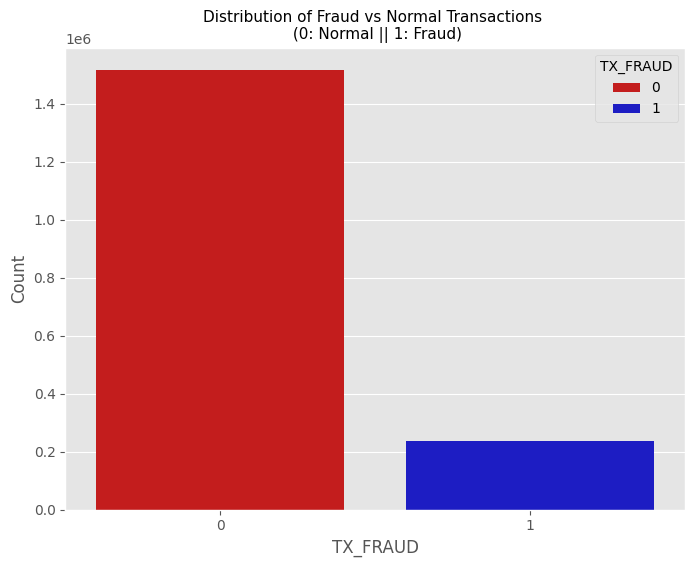

In [15]:
# Visualize the distribution of the target variable
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
colors = [ "#DF0101", "#0101DF"]
sns.countplot(x='TX_FRAUD', data = df, palette=colors, hue='TX_FRAUD')
plt.title('Distribution of Fraud vs Normal Transactions \n (0: Normal || 1: Fraud)', fontsize=11)
plt.xlabel('TX_FRAUD')
plt.ylabel('Count')
plt.show()

In [16]:
# Check for missing values
df.isnull().sum().sum()

np.int64(0)

In [17]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [18]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(1754155, 11)

In [20]:
# Standardize 'Amount' and 'Time'
scaler = StandardScaler()
df['TX_AMOUNT'] = scaler.fit_transform(df[['TX_AMOUNT']])
df['TX_TIME_SECONDS'] = scaler.fit_transform(df[['TX_TIME_SECONDS']])

In [21]:
df.head()

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DATE,TX_TIME
0,0,0,596,3156,-0.005605,-1.731195,0,0,0,20230101,31
1,1,1,4961,3412,0.227919,-1.731174,0,0,0,20230101,210
2,2,2,2,1365,0.765661,-1.731098,0,1,1,20230101,756
3,3,3,4128,8737,0.068634,-1.731077,0,0,0,20230101,929
4,4,4,927,9906,-0.041554,-1.731063,0,0,0,20230101,1034


In [22]:
# Split features and target
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    float64
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
 9   TX_DATE            int64  
 10  TX_TIME            int64  
dtypes: float64(2), int64(9)
memory usage: 147.2 MB


In [24]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DATE,TX_TIME
Unnamed: 0,1.000000,1.000000,-0.000389,-0.000690,0.002455,0.999999,0.999985,0.002650,0.004748,0.993175,0.005996
TRANSACTION_ID,1.000000,1.000000,-0.000389,-0.000690,0.002455,0.999999,0.999985,0.002650,0.004748,0.993175,0.005996
CUSTOMER_ID,-0.000389,-0.000389,1.000000,0.000389,-0.002633,-0.000389,-0.000389,0.004353,0.002359,-0.000143,-0.000010
TERMINAL_ID,-0.000690,-0.000690,0.000389,1.000000,-0.000758,-0.000690,-0.000690,-0.002160,-0.003291,-0.000773,-0.000037
TX_AMOUNT,0.002455,0.002455,-0.002633,-0.000758,1.000000,0.002453,0.002449,0.313427,0.416883,0.002344,0.001070
TX_TIME_SECONDS,0.999999,0.999999,-0.000389,-0.000690,0.002453,1.000000,0.999992,0.002650,0.004746,0.993188,0.004576
TX_TIME_DAYS,0.999985,0.999985,-0.000389,-0.000690,0.002449,0.999992,1.000000,0.002650,0.004746,0.993196,0.000592
TX_FRAUD,0.002650,0.002650,0.004353,-0.002160,0.313427,0.002650,0.002650,1.000000,0.949008,0.002555,0.000070
TX_FRAUD_SCENARIO,0.004748,0.004748,0.002359,-0.003291,0.416883,0.004746,0.004746,0.949008,1.000000,0.004540,0.000085
TX_DATE,0.993175,0.993175,-0.000143,-0.000773,0.002344,0.993188,0.993196,0.002555,0.004540,1.000000,0.000505


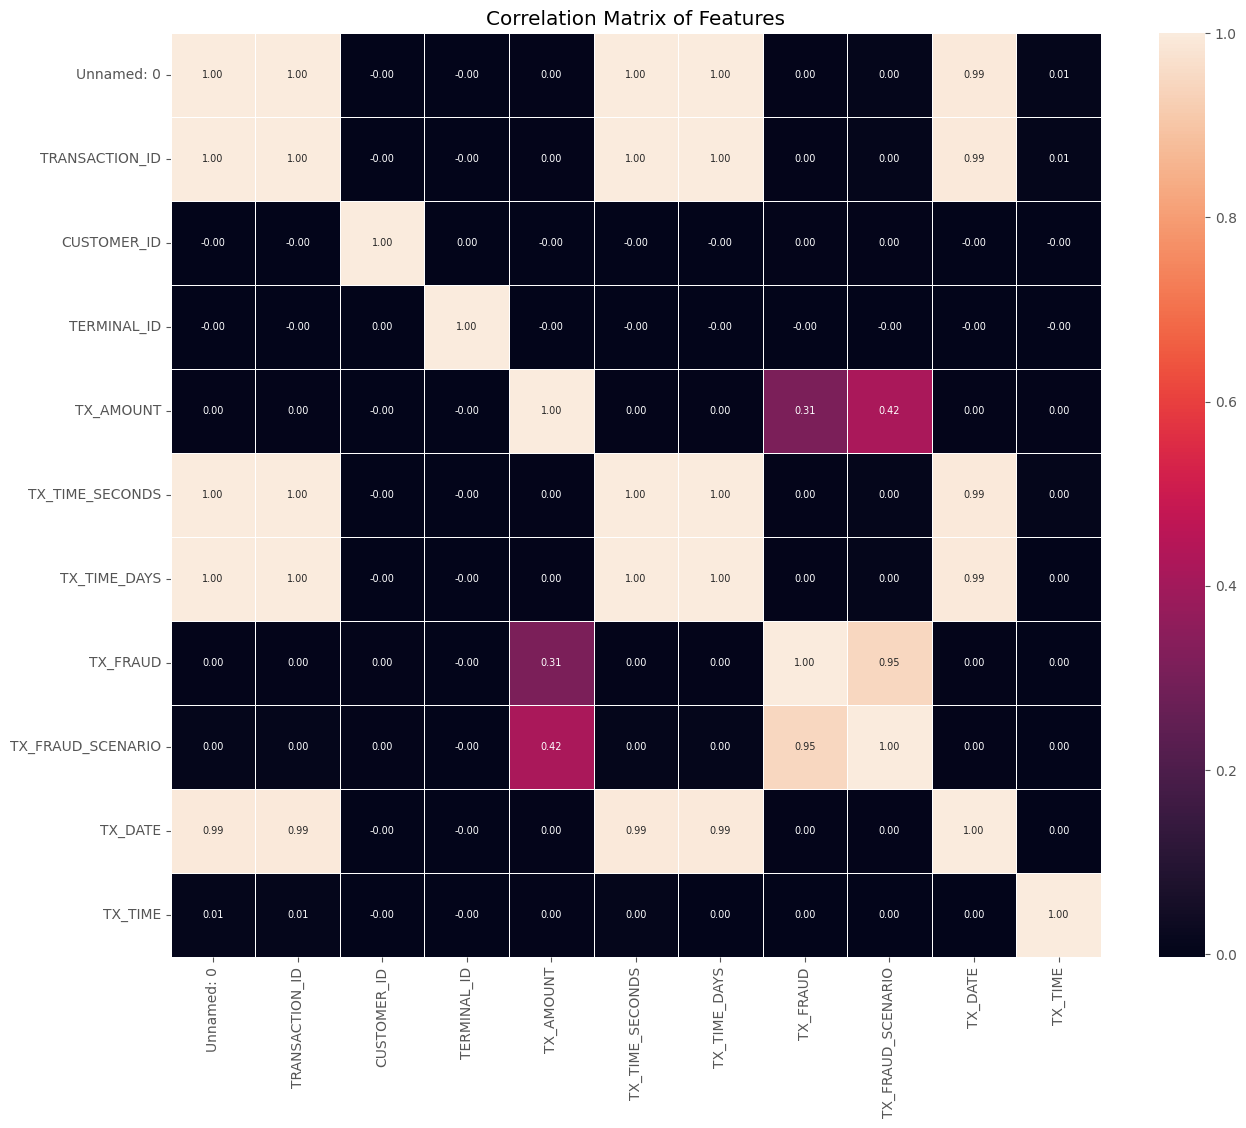

In [25]:
# Plot the Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size":7})
plt.title('Correlation Matrix of Features')
plt.show()

Split Data into Training and Test Sets

In [26]:
# Train-test split with imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Check the shape
X_train.shape

(1403324, 10)

In [28]:
X_test.shape

(350831, 10)

In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350831 entries, 1522835 to 1515046
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         350831 non-null  int64  
 1   TRANSACTION_ID     350831 non-null  int64  
 2   CUSTOMER_ID        350831 non-null  int64  
 3   TERMINAL_ID        350831 non-null  int64  
 4   TX_AMOUNT          350831 non-null  float64
 5   TX_TIME_SECONDS    350831 non-null  float64
 6   TX_TIME_DAYS       350831 non-null  int64  
 7   TX_FRAUD_SCENARIO  350831 non-null  int64  
 8   TX_DATE            350831 non-null  int64  
 9   TX_TIME            350831 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 29.4 MB


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1403324 entries, 1741849 to 121958
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1403324 non-null  int64  
 1   TRANSACTION_ID     1403324 non-null  int64  
 2   CUSTOMER_ID        1403324 non-null  int64  
 3   TERMINAL_ID        1403324 non-null  int64  
 4   TX_AMOUNT          1403324 non-null  float64
 5   TX_TIME_SECONDS    1403324 non-null  float64
 6   TX_TIME_DAYS       1403324 non-null  int64  
 7   TX_FRAUD_SCENARIO  1403324 non-null  int64  
 8   TX_DATE            1403324 non-null  int64  
 9   TX_TIME            1403324 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 117.8 MB


In [31]:
def train_model(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classifiers on the given training and test datasets.

    This function takes training and test feature sets and labels, trains three different classifiers
    (Logistic Regression, Decision Tree Classifier, and RandomForestClassifier) on the training data, 
    and evaluates their performance on the test data. For each classifier, it prints the confusion matrix, 
    classification report, ROC-AUC score, and plots the ROC curve.

    Parameters:
    X_train (pd.DataFrame or np.ndarray): Features of the training data.
    X_test (pd.DataFrame or np.ndarray): Features of the test data.
    y_train (pd.Series or np.ndarray): Labels of the training data.
    y_test (pd.Series or np.ndarray): Labels of the test data.

     Returns:
    None: This function does not return any values but prints evaluation metrics and plots.

    Notes:
    - The function assumes that the test data includes both positive and negative class samples.
    - ROC-AUC scores and ROC curves are only meaningful if the classifier provides probability estimates 
      for the positive class.
    - This function will display the ROC curves in separate plots for each classifier.
    """
    
    classifier = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(random_state=42)
    }

    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix:\n{conf_matrix}\n")

        # Accuracy
        print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")
        
        # Classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"\nClassification Report:\n{clf_report}\n")

        # ROC-AUC Score
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC-AUC Score (Imbalanced Data): {roc_auc}\n")
    
        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve (Imbalanced Data)\nusing {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        print("\n")


================ Logistic Regression ================

Confusion Matrix:
[[303524      0]
 [     0  47307]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    303524
           1       1.00      1.00      1.00     47307

    accuracy                           1.00    350831
   macro avg       1.00      1.00      1.00    350831
weighted avg       1.00      1.00      1.00    350831


ROC-AUC Score (Imbalanced Data): 1.0



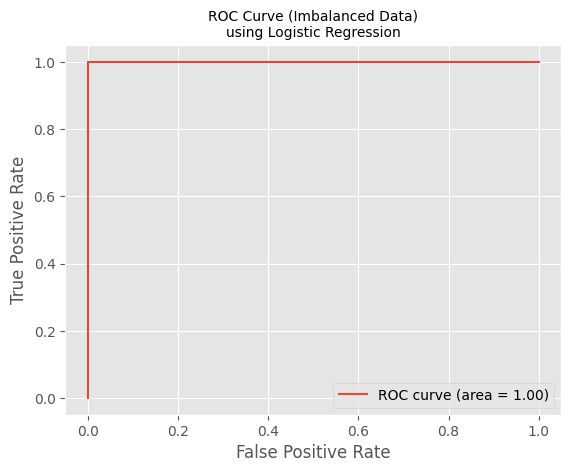




================ Decision Tree Classifier ================

Confusion Matrix:
[[303524      0]
 [     0  47307]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    303524
           1       1.00      1.00      1.00     47307

    accuracy                           1.00    350831
   macro avg       1.00      1.00      1.00    350831
weighted avg       1.00      1.00      1.00    350831


ROC-AUC Score (Imbalanced Data): 1.0



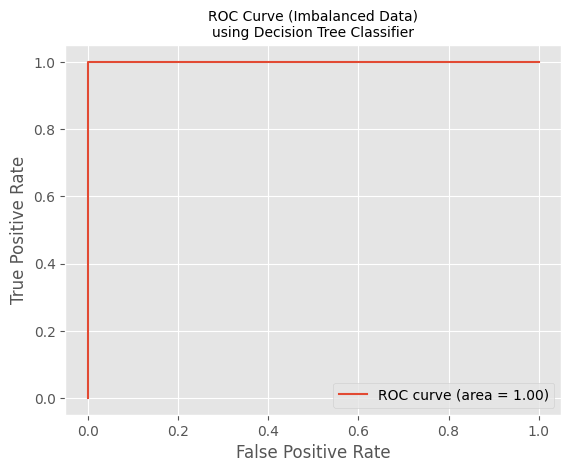




================ RandomForestClassifier ================

Confusion Matrix:
[[303524      0]
 [     0  47307]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    303524
           1       1.00      1.00      1.00     47307

    accuracy                           1.00    350831
   macro avg       1.00      1.00      1.00    350831
weighted avg       1.00      1.00      1.00    350831


ROC-AUC Score (Imbalanced Data): 1.0



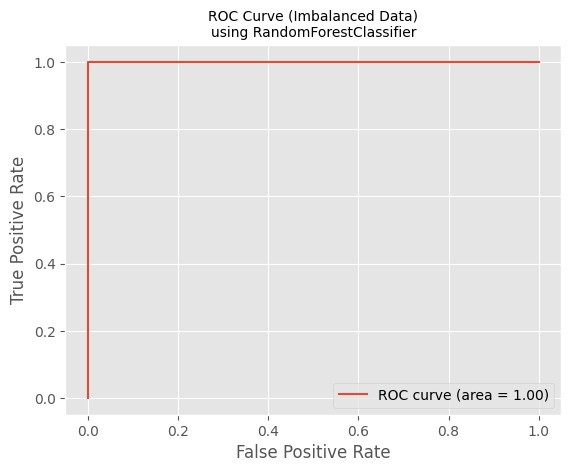

In [32]:
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)

Undersampling

In [33]:
# Separate normal and fraud transactions
normal = df[df['TX_FRAUD']==0]
fraud = df[df['TX_FRAUD']==1]

# Print shape for reference
print(f"Normal transactions shape: {normal.shape}")
print(f"Fraud transactions shape: {fraud.shape}")

Normal transactions shape: (1518186, 11)
Fraud transactions shape: (235969, 11)


In [34]:
# Undersample normal transactions
normal_sample = normal.sample(n=fraud.shape[0])

In [35]:
# Print the shape of the new normal transactions
print(f"New normal transactions shape: {normal_sample.shape}")

New normal transactions shape: (235969, 11)


In [36]:
# Concate updated normal transcations with old fraud transaction and make a new df
new_df = pd.concat([normal_sample, fraud], ignore_index=True)

In [37]:
# Print few rows of new df
new_df.head()

,Unnamed: 0,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DATE,TX_TIME
0,694095,694095,4946,5720,0.214695,-0.360455,72,0,0,20230314,101453
1,1442105,1442105,2539,6266,-0.297778,1.116551,150,0,0,20230531,111438
2,428441,428441,2020,6099,-0.424343,-0.887427,44,0,0,20230214,135938
3,872722,872722,4805,6997,-0.432226,-0.009570,90,0,0,20230401,231226
4,1461480,1461480,2641,4275,-0.313257,1.154907,152,0,0,20230602,115302


In [38]:
# Check new class distribution
new_df['TX_FRAUD'].value_counts()

TX_FRAUD
0    235969
1    235969
Name: count, dtype: int64

In [39]:
# Split new df into X and y
X = new_df.drop('TX_FRAUD', axis=1)
y = new_df['TX_FRAUD']

In [41]:
# Train test split on Undersampled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


================ Logistic Regression ================



C:\Users\ADITYA SINGH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[47210     0]
 [    0 47178]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47210
           1       1.00      1.00      1.00     47178

    accuracy                           1.00     94388
   macro avg       1.00      1.00      1.00     94388
weighted avg       1.00      1.00      1.00     94388


ROC-AUC Score (Imbalanced Data): 1.0



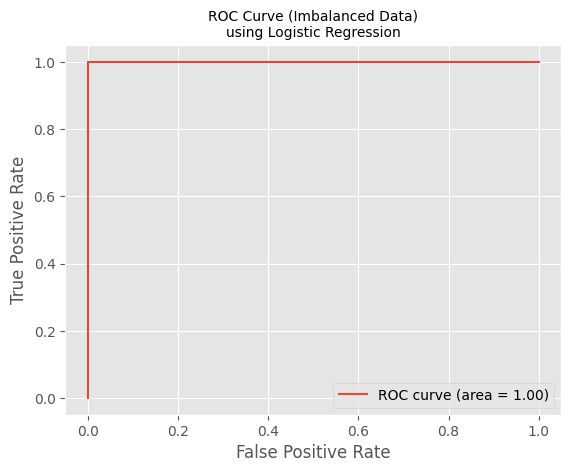




================ Decision Tree Classifier ================

Confusion Matrix:
[[47210     0]
 [    0 47178]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47210
           1       1.00      1.00      1.00     47178

    accuracy                           1.00     94388
   macro avg       1.00      1.00      1.00     94388
weighted avg       1.00      1.00      1.00     94388


ROC-AUC Score (Imbalanced Data): 1.0



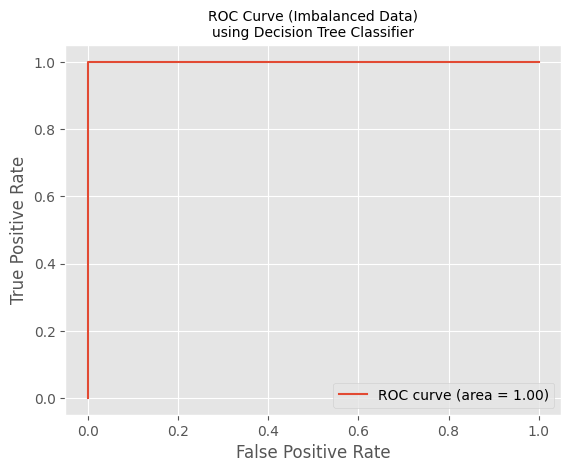




================ RandomForestClassifier ================

Confusion Matrix:
[[47210     0]
 [    0 47178]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47210
           1       1.00      1.00      1.00     47178

    accuracy                           1.00     94388
   macro avg       1.00      1.00      1.00     94388
weighted avg       1.00      1.00      1.00     94388


ROC-AUC Score (Imbalanced Data): 1.0



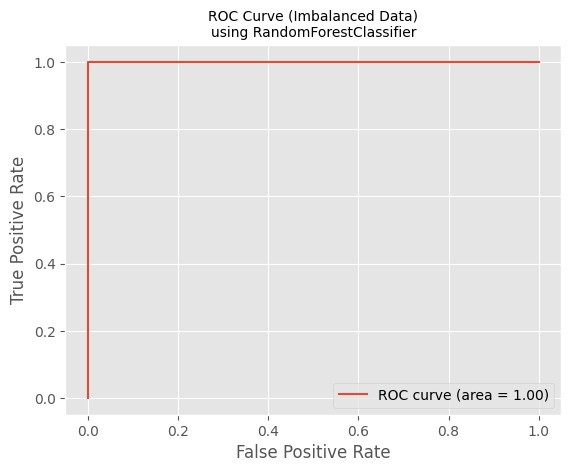

In [42]:
# Train models with undersampled data
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)

Oversampling

Use SMOTE to balance the dataset by oversampling the minority class

In [43]:
# Split features and target
X = df.drop('TX_FRAUD', axis=1)
y = df['TX_FRAUD']

In [44]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [45]:
# Check new class distribution
y_resampled.value_counts()

TX_FRAUD
0    1518186
1    1518186
Name: count, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


================ Logistic Regression ================



C:\Users\ADITYA SINGH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[303666      0]
 [     0 303609]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    303666
           1       1.00      1.00      1.00    303609

    accuracy                           1.00    607275
   macro avg       1.00      1.00      1.00    607275
weighted avg       1.00      1.00      1.00    607275


ROC-AUC Score (Imbalanced Data): 1.0



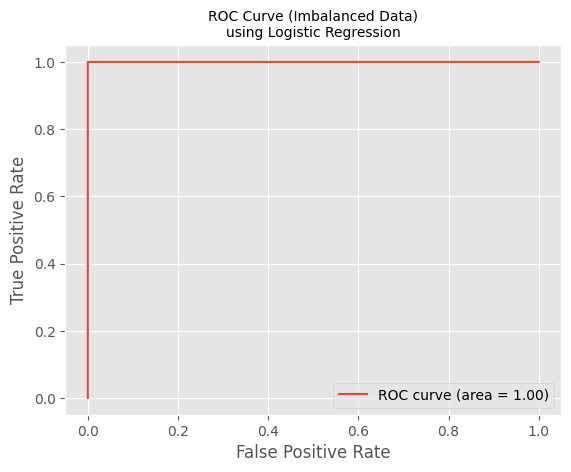




================ Decision Tree Classifier ================

Confusion Matrix:
[[303666      0]
 [     0 303609]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    303666
           1       1.00      1.00      1.00    303609

    accuracy                           1.00    607275
   macro avg       1.00      1.00      1.00    607275
weighted avg       1.00      1.00      1.00    607275


ROC-AUC Score (Imbalanced Data): 1.0



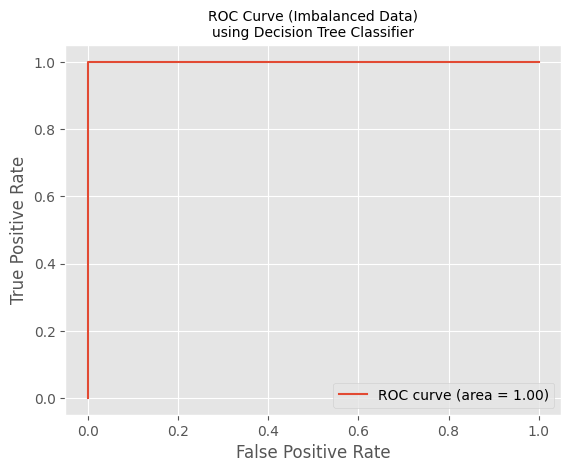




================ RandomForestClassifier ================

Confusion Matrix:
[[303666      0]
 [     0 303609]]


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    303666
           1       1.00      1.00      1.00    303609

    accuracy                           1.00    607275
   macro avg       1.00      1.00      1.00    607275
weighted avg       1.00      1.00      1.00    607275


ROC-AUC Score (Imbalanced Data): 1.0



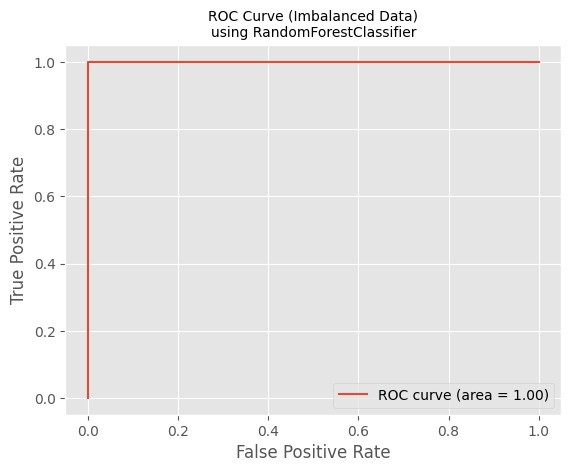

In [47]:
# Train models with undersampled data
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)

Save the Trained Model (Decision Tree Classifier)¶

In [48]:
# Pick a model, e.g. Decision Tree Classifier
# Fit the model with X_train, y_train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Save the model
joblib.dump(model, "Final Transactions.pkl")

['Final Transactions.pkl']

In [50]:
# Load the model
model = joblib.load("Final Transactions.pkl")

In [51]:
# Predict with a sample data
# Define the feature names (same as your training data)
feature_names = ['Unnamed: 0', 'TRANSACTION_ID', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD_SCENARIO', 'TX_DATE', 'TX_TIME']

# Create a DataFrame for the sample data
sample_data = pd.DataFrame([[3, 3, 4128, 8737, 620.65, 569, 0, 0, 20230101, 929]], columns=feature_names)

# Make a prediction
pred = model.predict(sample_data)

# Print the prediction result
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")


Normal Transaction
